# 1. Data Cleaning & Text Preprocessing

### Loading in data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import pickle
import contractions

In [1]:
#read by default 1st sheet of an excel file
#df = pd.read_excel(' Needs-Led Assessment Survey 2023 Raw Data.xlsx')
 
#df.head()

In [2]:
#renaming first row to be column names
#df.columns=df.iloc[0]
#df.head()

In [3]:
#deleting first row because we don't need it now that the first row is the column names
#df = df.drop([df.index[0]])
#df.head()

In [5]:
#we don't need Q1 - deleting consent question
#df.drop(df.columns[[0]], axis=1, inplace=True)
#df.head()

## 1.1a Renaming Features --
Q1: How long have you been on [LOCATION]?  
Q2: How long have you been in the [DOD SERVICE COMPONENT] (or connected to the [DOD SERVICE COMPONENT], if civilian)?  
Q3: What are your current responsibilities or what do you do in a typical day here?  
Q4: Do you have awareness of the [CLINIC] and what it does?  
Q5: If yes, what have you seen or heard?  
Q6: Do you have awareness of the prevention services offered by the [CLINIC]?  
Q7: If yes, what have you seen or heard?  
Q8: In your opinion, what can [CLINIC] Prevention & Education Specialists do to support [SERVICE MEMBERS] and their families in [LOCATION]?  
Q9: Do you have any other thoughts or suggestions?  
Q10: What is your impression of the relationships [SERVICE MEMBERS] have with their children here in [LOCATION]?  
Q11: What is your impression of the relationships [SERVICE MEMBERS] have with their significant others in [LOCATION]?  
Q12: Do you think there are problems here related to child abuse or domestic abuse?  
Q13: If yes, can you tell us about those problems?  
Q14: Can you tell me about your command's approach here related to family violence?  
Q15: Is there anything else you'd like to comment on?  
Q16: What is your rank/grade?  
Q17: If you selected other, please specific rank/grade:  

In [479]:
#some columns have same name, need to fix
# Changing columns name with index number
df.columns.values[0] = "Q1"
df.columns.values[1] = "Q2"
df.columns.values[2] = "Q3"
df.columns.values[3] = "Q4"
df.columns.values[4] = "Q5"
df.columns.values[5] = "Q6"
df.columns.values[6] = "Q7"
df.columns.values[7] = "Q8"
df.columns.values[8] = "Q9"
df.columns.values[9] = "Q10"
df.columns.values[10] = "Q11"
df.columns.values[11] = "Q12"
df.columns.values[12] = "Q13"
df.columns.values[13] = "Q14"
df.columns.values[14] = "Q15"
df.columns.values[15] = "Q16"
df.columns.values[16] = "Q17"

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 195
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      180 non-null    object
 1   Q2      179 non-null    object
 2   Q3      173 non-null    object
 3   Q4      180 non-null    object
 4   Q5      79 non-null     object
 5   Q6      155 non-null    object
 6   Q7      39 non-null     object
 7   Q8      98 non-null     object
 8   Q9      73 non-null     object
 9   Q10     109 non-null    object
 10  Q11     109 non-null    object
 11  Q12     149 non-null    object
 12  Q13     17 non-null     object
 13  Q14     112 non-null    object
 14  Q15     86 non-null     object
 15  Q16     152 non-null    object
 16  Q17     17 non-null     object
dtypes: object(17)
memory usage: 27.4+ KB


### Notes to self:
1) All questions are open text/free response.  
1a) This will require text analysis to process.  
2) There are a lot of rows with no responses.  
3) Let's take an quesiton by question approach for cleaning data before any analysis.  

# 1.2 Data cleaning - column by column

### <b> Q1  </b>  

Changing all answers to be in <B>years</b> as unit of measurement.

In [481]:
#What are all the unique values for Q1?
df['Q1'].unique()

array([nan, '8 years', '1 year', '7', '7 months', 'One year and a half',
       '1yr', '3 months', '2 years', '5 months', '3 months ', '15 months',
       '3 years', '3ヶ月', '8 months', '2 months', '2 years 10 months',
       '2 1/2 years', '11 months', '4 months', 'Almost 2 years',
       '2.5 years', '1 year ', '10 months', '498 days', '6 years',
       '22 months', '18 months', '3', '6 years ', '1 and a half years',
       '18 Months', '3 weeks', '2 years ', '3 years ', '1 year 6 months ',
       '1 year and 8 months', '4 years', '6 months', '3yrs',
       '2 Years and 10 months ', '1 month', '9 Months ', 'About 3 weeks',
       'Almost 4 weeks', '5 months ', '1 year and a half ', '1.5 years',
       '8 months ', '1 month ', '13 months', '1 year 1/2 ',
       '1 year and 6 months', 'Year and a half', '5months', '8months',
       '7 months ', '1.5 year', '2 weeks', '2 weeks ', '5', '25 days',
       '3 years 4 months', '2 months ', 'Three years', '1 week',
       'Two Months', '4 week

In [482]:
#going to change Q1 to be in YEARS

#Now we will remap the values of Q1 using years as unit measurement and then use the df.replace() function.

#Define Dict with the key-value pair to remap.
##simply using all the unique values in Q1 - have to do manually because no consistency in values
dict1 = {"8 years" : '8', "1 year" : '1', "7 months": '.58', "One year and a half" : '1.5', "1yr": '1',
          "3 months": '.25', '2 years': '2', '5 months': '.42', '3 months ': '.25', '15 months': '1.42',
       '3 years': '3', '3ヶ月': '.25', '8 months': '.67', '2 months':'.17', '2 years 10 months': '2.83',
       '2 1/2 years': '2.5', '11 months': '.92', '4 months': '.33', 'Almost 2 years': '2', '2.5 years': '2',
      '1 year ': '1', '10 months': '.83', '498 days': '1.36', '6 years':'6', '22 months': '1.83', '18 months': '1.5',
        '6 years ': '6', '1 and a half years': '1.5', '18 Months': '1.5', '3 weeks': '.06', '2 years ': '2',
          '3 years ': '3', '1 year 6 months ': '1.5', '1 year and 8 months': '1.67', '4 years': '4', 
        '6 months': '.5', '3yrs': '3', '2 Years and 10 months ': '2.83', '1 month': '.08',
       '9 Months ': '.75', 'About 3 weeks': '.06', 'Almost 4 weeks': '.08', '5 months ': '.42', 
       '1 year and a half ': '1.5', '1.5 years': '1.5', '8 months ': '.67', '1 month ': '.08',
       '13 months': '1.08', '1 year 1/2 ': '1.5', '1 year and 6 months': '1.5',
       'Year and a half': '1.5', '5months': '.42', '8months': '.67', '7 months ': '.58', '1.5 year': '1.5',
       '2 weeks': '.04', '2 weeks ': '.04', '25 days': '.08', '3 years 4 months': '3.33',
       '2 months ': '.17', 'Three years': '3', '1 week': '.04', 'Two Months': '.17', '4 weeks': '.08',
        'About 5 months': '.42', '24 months ': '2', '2weeks 1day': '.04', '1 year 7 months': '1.58',
       'One month': '.08', '10 days': '.04', 'Since December 26 2020': '2', '14 months': '1.17',
       '1 year 3 months': '1.25', '11 months ': '.92', '3 Months ': '.25', '3  Years': '3',
       'Over one year': '1', '3 YEARS': '3', '16 months': '1.33', '2 Months': '.17', 'Six Months': '.5',
       'Two years': '2', '4 months, deployment': '.33', '6-months': '.5', '25 months': '2.08',
       'A year and a half ': '1.5', '3years': '3', 'two months': '.17'}

#creating copy of df
df2=df

#mapping dictionary onto variable we wish to change the values of
df2["Q1"]= df2["Q1"].map(dict1) 

#renmaing column to include years as unit of measurement 
df2.rename(columns = {'Q1':'Q1 years'}, inplace = True)

#all unique values should be in years now
df2['Q1 years'].unique()
#hooray it worked!

array([nan, '8', '1', '.58', '1.5', '.25', '2', '.42', '1.42', '3', '.67',
       '.17', '2.83', '2.5', '.92', '.33', '.83', '1.36', '6', '1.83',
       '.06', '1.67', '4', '.5', '.08', '.75', '1.08', '.04', '3.33',
       '1.58', '1.17', '1.25', '1.33', '2.08'], dtype=object)

In [483]:
#need to change Q1 to a numeric column
df2["Q1 years"] = pd.to_numeric(df2["Q1 years"])

In [484]:
#Summary statistics for Q1
df2["Q1 years"].describe()

count    177.000000
mean       1.149492
std        1.188762
min        0.040000
25%        0.250000
50%        0.920000
75%        2.000000
max        8.000000
Name: Q1 years, dtype: float64

<AxesSubplot:ylabel='Frequency'>

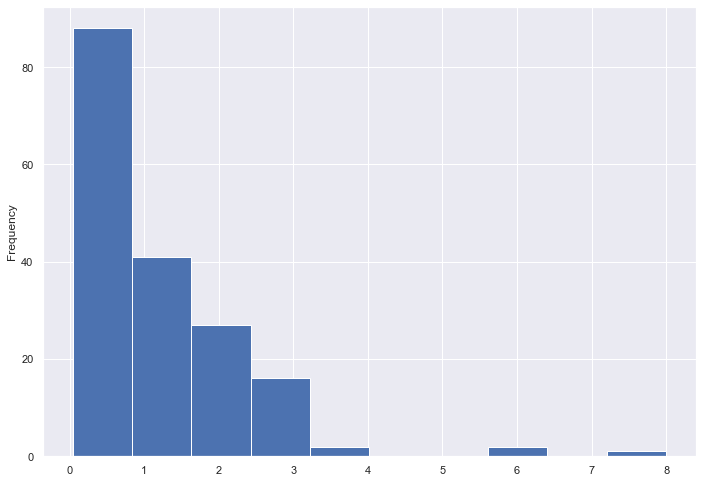

In [485]:
df2['Q1 years'].plot(kind='hist')
#https://www.nbshare.io/notebook/204214467/How-to-Plot-a-Histogram-in-Python/

### <b> Q2  </b>  


Changing all answers to be in <B>years</b> as unit of measurement.

In [6]:
#df2["Q2"].unique()

In [487]:
#going to change Q2 to be in YEARS - same process as Q1
#going to change question to YEARS IN SERVICE since many people responded that they are Navy personnel..

#Define Dict with the key-value pair to remap.
##simply using all the unique values in Q2 - have to do manually because no consistency in values
#DICTIONARY MAPPING REDACTED
#coding some as 999 because couldn't change to missing/NaN

        
df3=df2.replace({"Q2": dict2})

#renmaing column to include years as unit of measurement + service 
df3.rename(columns = {'Q2'
                      :'Q2 years'}, inplace = True)

#all unique values should be in years now
df3['Q2 years'].unique()

array([nan, '16', '14', '6', '15', '999', '.75', '7', '1.5', '17', '23',
       '4', '1', '2', '.5', '3', '0', '8', '25', '18.5', '18', '19', '10',
       '13', '2.5', '9', '1.75', '3.5', '2.17', '2.33', '4.5', '1.33',
       '3.83', '.83', '2.83', '1.17', '1.92', '1.08', '.92', '1.25', '11',
       '3.92', '.67', '2.67', '2.25', '.25', '5', '.58', '28.5', '20',
       '26', '3.75'], dtype=object)

In [488]:
#need to change 999 to missing
df3['Q2 years']=df3['Q2 years'].replace({'999':np.NaN})

#testing again
df3['Q2 years'].unique()

array([nan, '16', '14', '6', '15', '.75', '7', '1.5', '17', '23', '4',
       '1', '2', '.5', '3', '0', '8', '25', '18.5', '18', '19', '10',
       '13', '2.5', '9', '1.75', '3.5', '2.17', '2.33', '4.5', '1.33',
       '3.83', '.83', '2.83', '1.17', '1.92', '1.08', '.92', '1.25', '11',
       '3.92', '.67', '2.67', '2.25', '.25', '5', '.58', '28.5', '20',
       '26', '3.75'], dtype=object)

In [489]:
#need to change Q2 to a numeric column
df3['Q2 years'] = pd.to_numeric(df3["Q2 years"])

In [490]:
df3['Q2 years'].unique()

array([  nan, 16.  , 14.  ,  6.  , 15.  ,  0.75,  7.  ,  1.5 , 17.  ,
       23.  ,  4.  ,  1.  ,  2.  ,  0.5 ,  3.  ,  0.  ,  8.  , 25.  ,
       18.5 , 18.  , 19.  , 10.  , 13.  ,  2.5 ,  9.  ,  1.75,  3.5 ,
        2.17,  2.33,  4.5 ,  1.33,  3.83,  0.83,  2.83,  1.17,  1.92,
        1.08,  0.92,  1.25, 11.  ,  3.92,  0.67,  2.67,  2.25,  0.25,
        5.  ,  0.58, 28.5 , 20.  , 26.  ,  3.75])

In [491]:
#Summary statistics for Q2
df3['Q2 years'].describe()

count    176.000000
mean       4.491307
std        5.775097
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       28.500000
Name: Q2 years, dtype: float64

<AxesSubplot:ylabel='Frequency'>

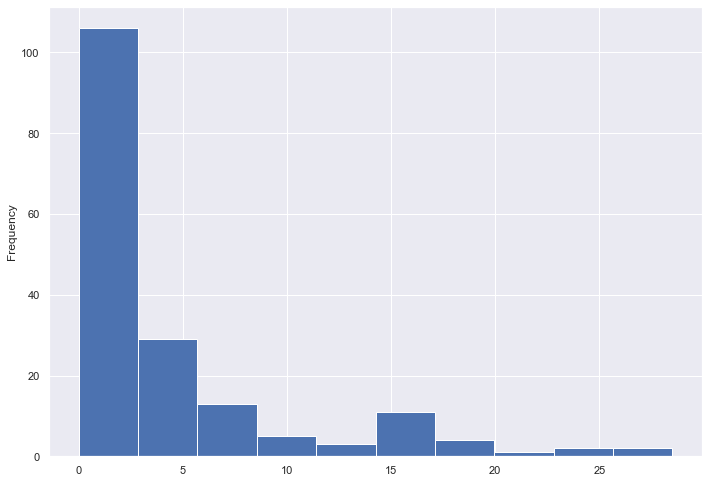

In [492]:
df3['Q2 years'].plot(kind='hist')

### <b> Q3  </b>  

Let's scope the responses...going to disregard this question for now, too messy.

In [7]:
#df3['Q3'].unique()

### <b> Q4  </b>  


Let's scope the responses...

In [494]:
df3['Q4'].unique()

array(['No', nan, 'Yes'], dtype=object)

<AxesSubplot:xlabel='Q4', ylabel='count'>

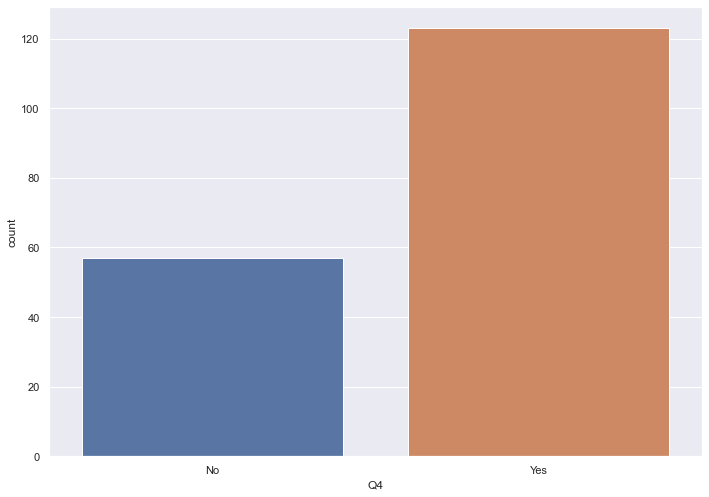

In [495]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')
sns.countplot(x =df3['Q4'])

In [496]:
#changing No to 0, Yes to 1
dict3 = {'No':'0', 'Yes': '1'}
        
df4=df3.replace({"Q4": dict3})

#all unique values should be numbers now
df4['Q4'].unique()


array(['0', nan, '1'], dtype=object)

In [497]:
#what percent said Yes (1) and No (0) and how many missing?
df4['Q4'].value_counts(normalize=True, dropna=False)

1      0.630769
0      0.292308
NaN    0.076923
Name: Q4, dtype: float64

In [498]:
#not as percents
df4['Q4'].value_counts(dropna=False)

1      123
0       57
NaN     15
Name: Q4, dtype: int64

In [499]:
#need to change to a numeric column
df4["Q4"] = pd.to_numeric(df4["Q4"])

### <b> Q5  </b>  

Let's scope the responses...will come back to this

In [8]:
#df4['Q5'].unique()

### <b> Q6  </b>   

Let's scope the responses...will come back to this

In [501]:
df4["Q6"].unique()

array(['No', nan, 'Yes'], dtype=object)

<AxesSubplot:xlabel='Q6', ylabel='count'>

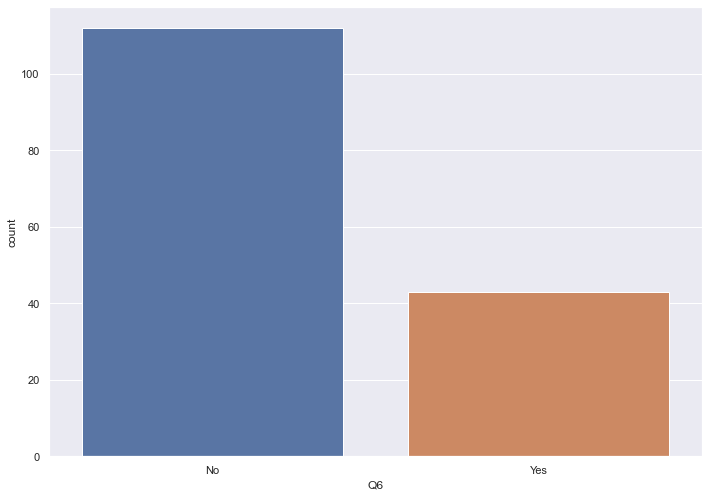

In [502]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')
sns.countplot(x =df4["Q6"])

In [503]:
#changing No to 0, Yes to 1
dict4 = {'No':'0', 'Yes': '1'}
        
df5=df4.replace({"Q6": dict4})

#all unique values should be numbers now
df5["Q6"].unique()


array(['0', nan, '1'], dtype=object)

In [504]:
#what percent said Yes (1) and No (0) and how many missing?
df5["Q6"].value_counts(normalize=True, dropna=False)

0      0.574359
1      0.220513
NaN    0.205128
Name: Q6, dtype: float64

In [505]:
df5["Q6"].value_counts(dropna=False)

0      112
1       43
NaN     40
Name: Q6, dtype: int64

In [506]:
#need to change to a numeric column
df5["Q6"] = pd.to_numeric(df5["Q6"])

### <b> Q7  </b>   

Let's scope the responses...will come back to this

In [9]:
#df5['Q7'].unique()

### <b> Q8  </b>   

Let's scope the responses...will come back to this

In [10]:
#df5['Q8'].unique()

### <b> Q9  </b>   

Let's scope the responses...will come back to this

In [509]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 195
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q1 years  177 non-null    float64
 1   Q2 years  176 non-null    float64
 2   Q3        173 non-null    object 
 3   Q4        180 non-null    float64
 4   Q5        79 non-null     object 
 5   Q6        155 non-null    float64
 6   Q7        39 non-null     object 
 7   Q8        98 non-null     object 
 8   Q9        73 non-null     object 
 9   Q10       109 non-null    object 
 10  Q11       109 non-null    object 
 11  Q12       149 non-null    object 
 12  Q13       17 non-null     object 
 13  Q14       112 non-null    object 
 14  Q15       86 non-null     object 
 15  Q16       152 non-null    object 
 16  Q17       17 non-null     object 
dtypes: float64(4), object(13)
memory usage: 31.5+ KB


In [11]:
#df5['Q9'].unique()

### <b> Q10  </b>   

Let's scope the responses...will come back to this

In [12]:
#df5['Q10'].unique()

### <b> Q11 </b>   

Let's scope the responses...will come back to this

In [13]:
#df5['Q11'].unique()

### <b> Q12  </b>   

Let's scope the responses...will come back to this

In [513]:
df5['Q12'].unique()

array(['No', nan, 'Yes'], dtype=object)

<AxesSubplot:xlabel='Q12', ylabel='count'>

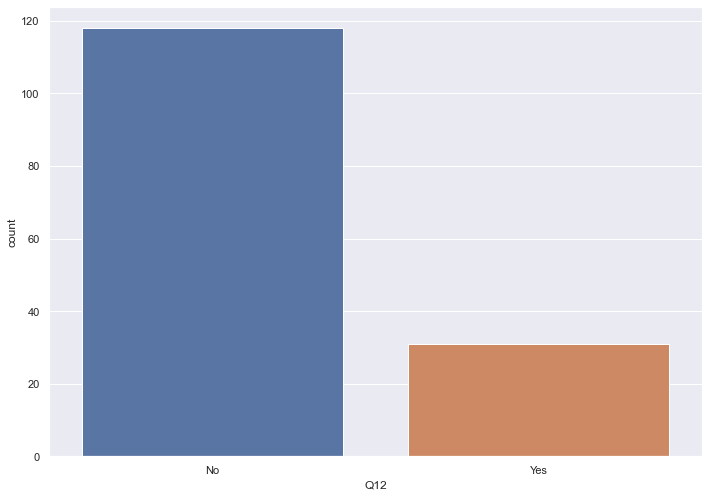

In [514]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')
sns.countplot(x =df5["Q12"])

In [515]:
#changing No to 0, Yes to 1
yes_no = {'No':'0', 'Yes': '1'}
        
df6=df5.replace({"Q12": yes_no})

#all unique values should be numbers now
df6["Q12"].unique()


array(['0', nan, '1'], dtype=object)

In [516]:
#what percent said Yes (1) and No (0) and how many missing?
df6["Q12"].value_counts(normalize=True, dropna=False)

0      0.605128
NaN    0.235897
1      0.158974
Name: Q12, dtype: float64

In [517]:
df6["Q12"].value_counts(dropna=False)

0      118
NaN     46
1       31
Name: Q12, dtype: int64

In [518]:
#need to change to a numeric column
df6["Q12"] = pd.to_numeric(df6["Q12"])

### <b> Q13  </b>   

Let's scope the responses...will come back to this

In [519]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 195
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q1 years  177 non-null    float64
 1   Q2 years  176 non-null    float64
 2   Q3        173 non-null    object 
 3   Q4        180 non-null    float64
 4   Q5        79 non-null     object 
 5   Q6        155 non-null    float64
 6   Q7        39 non-null     object 
 7   Q8        98 non-null     object 
 8   Q9        73 non-null     object 
 9   Q10       109 non-null    object 
 10  Q11       109 non-null    object 
 11  Q12       149 non-null    float64
 12  Q13       17 non-null     object 
 13  Q14       112 non-null    object 
 14  Q15       86 non-null     object 
 15  Q16       152 non-null    object 
 16  Q17       17 non-null     object 
dtypes: float64(5), object(12)
memory usage: 31.5+ KB


In [14]:
#df6['Q13'].unique()

### <b> Q14  </b>   

Let's scope the responses...will come back to this

In [15]:
#df6['Q14'].unique()

### <b> Q15  </b>   

Let's scope the responses...will come back to this

In [522]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 195
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q1 years  177 non-null    float64
 1   Q2 years  176 non-null    float64
 2   Q3        173 non-null    object 
 3   Q4        180 non-null    float64
 4   Q5        79 non-null     object 
 5   Q6        155 non-null    float64
 6   Q7        39 non-null     object 
 7   Q8        98 non-null     object 
 8   Q9        73 non-null     object 
 9   Q10       109 non-null    object 
 10  Q11       109 non-null    object 
 11  Q12       149 non-null    float64
 12  Q13       17 non-null     object 
 13  Q14       112 non-null    object 
 14  Q15       86 non-null     object 
 15  Q16       152 non-null    object 
 16  Q17       17 non-null     object 
dtypes: float64(5), object(12)
memory usage: 31.5+ KB


In [16]:
#df6['Q15'].unique()

### <b> Q16  </b>   

Let's scope the responses...will come back to this

In [524]:
df6['Q16'].value_counts()

E3                  61
E2                  35
E4                  18
E5                  12
Spouse/Dependent     9
O-5                  4
E7                   3
E8                   3
E6                   2
O-6                  1
O-3                  1
E9                   1
Other                1
O-4                  1
Name: Q16, dtype: int64

In [525]:
#going to change response values for Q16 to be uniform

#Define Dict with the key-value pair to remap.
rank_dict = {"O-5" : 'O5', "O-4": 'O4', "O-6": "O6", "O-3": 'O3'}

#mapping dictionary onto variable we wish to change the values of
df7=df6.replace({"Q16": rank_dict})

df7['Q16'].value_counts()
#hooray it worked!

E3                  61
E2                  35
E4                  18
E5                  12
Spouse/Dependent     9
O5                   4
E7                   3
E8                   3
E6                   2
O6                   1
O3                   1
E9                   1
Other                1
O4                   1
Name: Q16, dtype: int64

<AxesSubplot:xlabel='Q16', ylabel='count'>

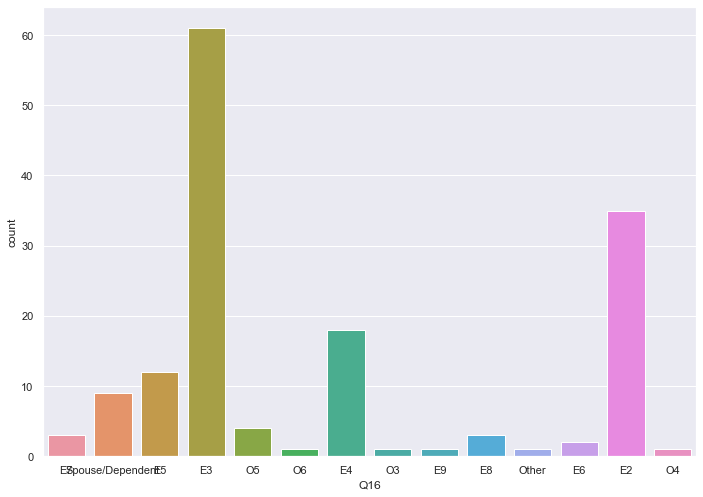

In [526]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')
sns.countplot(x =df7['Q16'])

In [527]:
df7['Q16'].unique()

array([nan, 'E7', 'Spouse/Dependent', 'E5', 'E3', 'O5', 'O6', 'E4', 'O3',
       'E9', 'E8', 'Other', 'E6', 'E2', 'O4'], dtype=object)

### Rank categories
E1-E3: Junior (1)  
E4-E5: NCO (2)  
E6+: SNCO (3)  
Officer: O1+ (4)  
Spouse/Dep: (5)  
Other: (6)  

In [528]:
#need to code these values to be numbers so can use as a numeric value

#Define Dict with the key-value pair to remap.
##simply using all the unique values in Q1 - have to do manually because no consistency in values
rank_cat = {"E1" : '1', "E2": '1', "E3": '1',
        "E4": '2', "E5": '2',
        "E6": '3', "E7": '3', "E8": '3', "E9": '3',
         "O5": '4', "O6": '4', "O4": '4', "O3": '4',
         "Spouse/Dependent": '5',
         "Other": '6'
        }

#mapping dictionary onto variable we wish to change the values of
df8 = df7.replace({'Q16': rank_cat}) 

#renmaing column
df8.rename(columns = {'Q16':'Q16 rank_cat'}, inplace = True)

#all unique values should be categories
df8['Q16 rank_cat'].unique()
#hooray it worked!

array([nan, '3', '5', '2', '1', '4', '6'], dtype=object)

In [529]:
df8['Q16 rank_cat'].value_counts()

#E1-E3: Junior (1)  
#E4-E5: NCO (2)  
#E6+: SNCO (3)  
#Officer: O1+ (4)  
#Spouse/Dep: (5)  
#Other: (6) 

1    96
2    30
3     9
5     9
4     7
6     1
Name: Q16 rank_cat, dtype: int64

<AxesSubplot:xlabel='Q16 rank_cat', ylabel='count'>

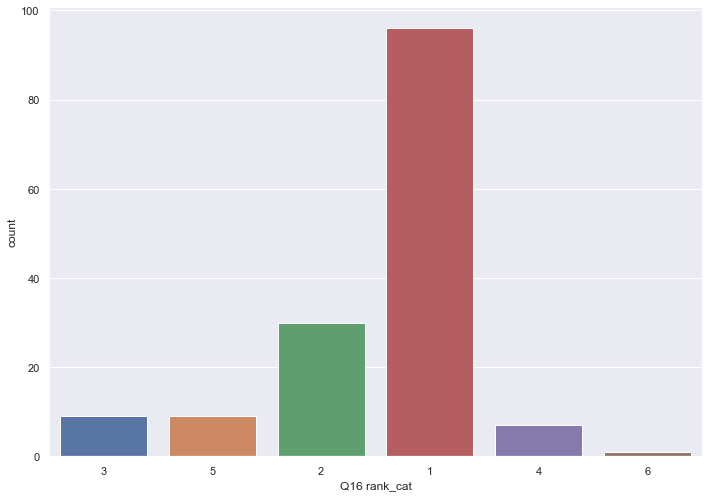

In [530]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')
sns.countplot(x =df8['Q16 rank_cat'])

In [531]:
df8["Q16 rank_cat"].value_counts(normalize=True, dropna=False)

#E1-E3: Junior (1)  
#E4-E5: NCO (2)  
#E6+: SNCO (3)  
#Officer: O1+ (4)  
#Spouse/Dep: (5)  
#Other: (6)

1      0.492308
NaN    0.220513
2      0.153846
3      0.046154
5      0.046154
4      0.035897
6      0.005128
Name: Q16 rank_cat, dtype: float64

In [532]:
#need to change to a numeric column
df8["Q16 rank_cat"] = pd.to_numeric(df8["Q16 rank_cat"])

### <b> Q17  </b>   

Let's scope the responses...will come back to this

In [17]:
#df8['Q17'].value_counts()

In [18]:
#running this to see if anyone put a value for Q17 but not Q16
#df8.groupby(by=['Q16 rank_cat']).Q17.value_counts()
#Total in above cell is 17 and total below is 17 so it makes sense...no one has a value for Q17 that didn't have a value for Q16

In [535]:
#since Q17 is of no value, going to remove column
df8.drop(columns=df8.columns[-1], 
        axis=1, 
        inplace=True)

df8.head()

,Q1 years,Q2 years,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16 rank_cat
1,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <b> 1.3 Final Dataset  </b>   
Q1: How long have you been on [LOCATION]?  <b>Coded as YEARS</b>  
Q2: How long have you been in the [DOD] (or connected to the [SERVICE COMPONENT], if civilian)?  <b>Coded as YEARS</b>  
Q3: What are your current responsibilities or what do you do in a typical day here?  <b>Need to explore...</b>  
Q4: Do you have awareness of the [CLINIC] and what it does?  <b>Coded as Yes (1), No (0)</b>  
Q5: If yes, what have you seen or heard?  <b>Need to explore...</b>  
Q6: Do you have awareness of the prevention services offered by the [CLINIC]?  <b>Coded as Yes (1), No (0)</b>    
Q7: If yes, what have you seen or heard?  <b>Need to explore...</b>  
Q8: In your opinion, what can [CLINIC] Prevention & Education Specialists do to support [SERVICE MEMBER] and their families in [LOCATION]?  <b>Need to explore...</b>  
Q9: Do you have any other thoughts or suggestions?  <b>Need to explore...</b>  
Q10: What is your impression of the relationships [SERVICE MEMBER] have with their children here in [LOCATION]?  <b>Need to explore...</b>  
Q11: What is your impression of the relationships [SERVICE MEMBER] have with their significant others in [LOCATION]?  <b>Need to explore...</b>  
Q12: Do you think there are problems here related to child abuse or domestic abuse?  <b>Coded as Yes (1), No (0)</b>  
Q13: If yes, can you tell us about those problems?   <b>Need to explore...</b>    
Q14: Can you tell me about your command's approach here related to family violence?  <b>Need to explore...</b>  
Q15: Is there anything else you'd like to comment on?  <b>Need to explore...</b>  
Q16: What is your rank/grade?  <b>Coded as Junior (1) NCO (2) SNCO (3) O1+ (4) Spouse/Dep (5) Other (6)</b>  



In [536]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 195
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      177 non-null    float64
 1   Q2 years      176 non-null    float64
 2   Q3            173 non-null    object 
 3   Q4            180 non-null    float64
 4   Q5            79 non-null     object 
 5   Q6            155 non-null    float64
 6   Q7            39 non-null     object 
 7   Q8            98 non-null     object 
 8   Q9            73 non-null     object 
 9   Q10           109 non-null    object 
 10  Q11           109 non-null    object 
 11  Q12           149 non-null    float64
 12  Q13           17 non-null     object 
 13  Q14           112 non-null    object 
 14  Q15           86 non-null     object 
 15  Q16 rank_cat  152 non-null    float64
dtypes: float64(6), object(10)
memory usage: 30.0+ KB


In [19]:
#df8.head()

In [538]:
df8.shape

(195, 16)

In [539]:
df = df8

# 1.4 Text Preprocessing

- addressing null values
- change one respondent's japanese text to english
- make all lower case
- expand all contractions out (i.e., you're to become you are)
- remove all non alphanumeric characters, eg, quotes, punctuation, brackets, etc.
- lemmatize text

### <i>The below questions will have text pre-processing applied to them:</i>  
Q3: What are your current responsibilities or what do you do in a typical day here?  <b>Need to explore...</b>  
Q5: If yes, what have you seen or heard?  <b>Need to explore...</b>  
Q7: If yes, what have you seen or heard?  <b>Need to explore...</b>  
Q8: In your opinion, what can [CLINIC] Prevention & Education Specialists do to support [SERVICE MEMBER] and their families in [LOCATION]?  <b>Need to explore...</b>  
Q9: Do you have any other thoughts or suggestions?  <b>Need to explore...</b>  
Q10: What is your impression of the relationships [SERVICE MEMBERS] have with their children here in [LOCATION]?  <b>Need to explore...</b>  
Q11: What is your impression of the relationships [SERVICE MEMBERS] have with their significant others in [LOCATION]?  <b>Need to explore...</b>  
Q13: If yes, can you tell us about those problems?   <b>Need to explore...</b>    
Q14: Can you tell me about your command's approach here related to family violence?  <b>Need to explore...</b>  
Q15: Is there anything else you'd like to comment on?  <b>Need to explore...</b>  

In [540]:
#addressing null values
#going to impute IGNORE and then delete later
df.fillna("IGNORE", inplace=True)

In [541]:
df.info()
#hooray it worked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 195
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Q1 years      195 non-null    object
 1   Q2 years      195 non-null    object
 2   Q3            195 non-null    object
 3   Q4            195 non-null    object
 4   Q5            195 non-null    object
 5   Q6            195 non-null    object
 6   Q7            195 non-null    object
 7   Q8            195 non-null    object
 8   Q9            195 non-null    object
 9   Q10           195 non-null    object
 10  Q11           195 non-null    object
 11  Q12           195 non-null    object
 12  Q13           195 non-null    object
 13  Q14           195 non-null    object
 14  Q15           195 non-null    object
 15  Q16 rank_cat  195 non-null    object
dtypes: object(16)
memory usage: 30.0+ KB


### 1.4.1 changing respondent text to english

In [542]:
#Finding which row is the foreign language text...
#it is index/row 25
df['Q8'].loc[lambda x: x=='心のケア'].index

Int64Index([25], dtype='int64')

In [543]:
#here is the row w/ japanese text
df.loc[[25]]

,Q1 years,Q2 years,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16 rank_cat
25,0.25,0.5,保育士,1.0,IGNORE,0.0,IGNORE,心のケア,IGNORE,とても素晴らしい,優しい、フレンドリー,0.0,IGNORE,IGNORE,IGNORE,5.0


In [544]:
#changing to english
#https://www.tutorialspoint.com/python_text_processing/python_text_translation.htm
from translate import Translator
translator= Translator(from_lang="japanese",to_lang="english")
Q3 = translator.translate("保育士")
print(Q3)

Nanny


In [545]:
#replacing Q3 with new english value
df.at[25,'Q3'] = 'Nanny'
#sanity check
df.loc[[25]]

,Q1 years,Q2 years,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16 rank_cat
25,0.25,0.5,保育士,1.0,IGNORE,0.0,IGNORE,心のケア,IGNORE,とても素晴らしい,優しい、フレンドリー,0.0,IGNORE,IGNORE,IGNORE,5.0


In [546]:
#repeating these steps for the remaining questions
Q8 = translator.translate("心のケア")
Q10 = translator.translate("とても素晴らしい")
Q11 = translator.translate("優しい、フレンドリー")
print(Q8, Q10, Q11)

Mental Health It's just wonderful. F R I E N D L Y


In [547]:
#replacing with new english values
df.at[25,'Q8'] = 'Mental Health'
df.at[25,'Q10'] = 'It is just wonderful.'
df.at[25,'Q11'] = 'friendly'
#sanity check
df.loc[[25]]

,Q1 years,Q2 years,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16 rank_cat
25,0.25,0.5,保育士,1.0,IGNORE,0.0,IGNORE,心のケア,IGNORE,とても素晴らしい,優しい、フレンドリー,0.0,IGNORE,IGNORE,IGNORE,5.0


In [548]:
#first need to convert the string variables to str data type
df['Q3']=df['Q3'].astype(str)
df['Q5']=df['Q5'].astype(str)
df['Q7']=df['Q7'].astype(str)
df['Q8']=df['Q8'].astype(str)
df['Q9']=df['Q9'].astype(str)
df['Q10']=df['Q10'].astype(str)
df['Q11']=df['Q11'].astype(str)
df['Q13']=df['Q13'].astype(str)
df['Q14']=df['Q14'].astype(str)
df['Q15']=df['Q15'].astype(str)

### 1.4.2. Making all text lowercase

In [549]:
#making all text lowercase
df['Q3'] = df['Q3'].map(lambda x: x.lower())
df['Q5'] = df['Q5'].map(lambda x: x.lower())
df['Q7'] = df['Q7'].map(lambda x: x.lower())
df['Q8'] = df['Q8'].map(lambda x: x.lower())
df['Q9'] = df['Q9'].map(lambda x: x.lower())
df['Q10'] = df['Q10'].map(lambda x: x.lower())
df['Q11'] = df['Q11'].map(lambda x: x.lower())
df['Q13'] = df['Q13'].map(lambda x: x.lower())
df['Q14'] = df['Q14'].map(lambda x: x.lower())
df['Q15'] = df['Q15'].map(lambda x: x.lower())

### 1.4.3. Expanding all contractions

In [550]:
#expanding all the contractions
#code from: https://www.analyticsvidhya.com/blog/2022/01/text-cleaning-methods-in-nlp/
#https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/
df['Q3'] = df['Q3'].map(lambda x: contractions.fix(x))
df['Q5'] = df['Q5'].map(lambda x: contractions.fix(x))
df['Q7'] = df['Q7'].map(lambda x: contractions.fix(x))
df['Q8'] = df['Q8'].map(lambda x: contractions.fix(x))
df['Q9'] = df['Q9'].map(lambda x: contractions.fix(x))
df['Q10'] = df['Q10'].map(lambda x: contractions.fix(x))
df['Q11'] = df['Q11'].map(lambda x: contractions.fix(x))
df['Q13'] = df['Q13'].map(lambda x: contractions.fix(x))
df['Q14'] = df['Q14'].map(lambda x: contractions.fix(x))
df['Q15'] = df['Q15'].map(lambda x: contractions.fix(x))

### 1.4.4 Removing all non alphanumeric characters

In [551]:
#removing all non alphanumeric characters, eg, quotes, punctuation, brackets, etc
df['Q3'] = df['Q3'].map(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
df['Q5'] = df['Q5'].map(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
df['Q7'] = df['Q7'].map(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
df['Q8'] = df['Q8'].map(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
df['Q9'] = df['Q9'].map(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
df['Q10'] = df['Q10'].map(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
df['Q11'] = df['Q11'].map(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
df['Q13']= df['Q13'].map(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
df['Q14'] = df['Q14'].map(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
df['Q15']= df['Q15'].map(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))

In [20]:
#sanity check
#df['Q15'].unique()

### 1.4.6 Spell checking
https://medium.com/@nutanbhogendrasharma/spelling-correction-of-the-text-data-in-natural-language-processing-e9848407cf3b

In [553]:
!pip install autocorrect

In [554]:
from autocorrect import Speller

In [555]:
spell1 = Speller()

In [21]:
#df['Q5'].head(50)

In [22]:
#df['Q5'].apply(lambda x: str(spell1(x)))

In [23]:
#df['Q5'].head(50)

In [26]:
#df['Q7'].apply(lambda x: str(spell1(x)))
#df['Q8'].apply(lambda x: str(spell1(x)))
#df['Q9'].apply(lambda x: str(spell1(x)))
#df['Q10'].apply(lambda x: str(spell1(x)))
#df['Q11'].apply(lambda x: str(spell1(x)))
#df['Q13'].apply(lambda x: str(spell1(x)))
#df['Q14'].apply(lambda x: str(spell1(x)))
#df['Q15'].apply(lambda x: str(spell1(x)))

In [560]:
#let's replace all IGNORE as NaN
#need to change if nan, to missing because it's not picking up on it
df.replace('IGNORE', np.NaN, inplace=True)
df.replace('ignore', np.NaN, inplace=True)
df.replace('[ignore]', np.NaN, inplace=True)
df.replace('None', np.NaN, inplace=True)

In [24]:
#df.head(10)

In [562]:
#deleting rows of just blank missing data across all columns
df = df.dropna(how = 'all')

In [25]:
#df

In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 195
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      177 non-null    float64
 1   Q2 years      176 non-null    float64
 2   Q3            173 non-null    object 
 3   Q4            180 non-null    float64
 4   Q5            79 non-null     object 
 5   Q6            155 non-null    float64
 6   Q7            39 non-null     object 
 7   Q8            98 non-null     object 
 8   Q9            73 non-null     object 
 9   Q10           109 non-null    object 
 10  Q11           109 non-null    object 
 11  Q12           149 non-null    float64
 12  Q13           17 non-null     object 
 13  Q14           112 non-null    object 
 14  Q15           86 non-null     object 
 15  Q16 rank_cat  152 non-null    float64
dtypes: float64(6), object(10)
memory usage: 24.2+ KB


In [565]:
df.to_pickle("df_clean_no_lemma.pkl")  
#this is our clean dataset BEFORE LEMMATIZATION 
#which will be turned into varying corpi
#we have a varying # of rows across a varying number of columns.
#each string question will be its own text with the rows as the respondents aka "documents"